In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
import Common_Functions as cf
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/noshift1.csv',header = None))

def data_normaliser(data):
    mean = np.mean(data, axis = 0)
    std = np.std(data,axis = 0)
    return (data -mean)/std 

In [3]:
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:8]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:8]), df_pions[-1000:,-1]

In [4]:
opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.7, beta_2= 0.99)
#inital_test = trained_network(train_x,train_y,val_x,val_y,[16,16], optimizer= opt, verbose= 0).history


In [5]:
#plt.plot(range(1,101),inital_test['mean_absolute_percentage_error'])
#print(np.min(inital_test['mean_absolute_percentage_error']))

Initial Work - What metric am i going to define a minimum by
- Ideally I dont want to look at each graph- Thus I think some kind of exponential smoothing should be added, 
this weights each point with history 
-Possible Idea --- Find a minimum, If the mean of the points after is greater than the standard deviation of 20 nearest neighbours, then this is a U shape tp - find some way of assesing the error there
                --- if you find a minimum and point plus std is less than future points then you can take the mean of future points and calculate the eror, 
                --- if the minima is the final point take that and maybe label 

Testing convergance with sample size. 
Going to take in the range of 10 hours 
Im going to absolutely cook my computer 


In [6]:

def parallel_test(num_points, train_x,train_y, width):
    number_of_training_points = np.geomspace(10,len(train_x),num = num_points,dtype= int)
    #print(number_of_training_points)
    min_mae = np.zeros((num_points,width))
    is_last_epoc = np.zeros_like(min_mae)
    for i in range(num_points): 
        print('Loop Number #',i)
        for j in range(width):
            history  =  cf.trained_network(train_x[:number_of_training_points[i]],train_y[:number_of_training_points[i]],val_x,val_y,[16,16], optimizer= opt, verbose= 0).history
            mae = np.array(history['mean_absolute_percentage_error'])
            min_mae[i,j] = np.min(mae)

            if np.argmin(mae) == len(mae)-1: is_last_epoc[i,j] = 1
    return min_mae,is_last_epoc,number_of_training_points
        

In [7]:
points = 50
test_width = 10
min_mae, min_val_bool, training_points = parallel_test(points,train_x,train_y, test_width)

Loop Number # 0


2021-11-04 13:17:57.699111: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-04 13:17:57.699139: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Sean-PC
2021-11-04 13:17:57.699144: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Sean-PC
2021-11-04 13:17:57.699251: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.63.1
2021-11-04 13:17:57.699266: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.63.1
2021-11-04 13:17:57.699270: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.63.1
2021-11-04 13:17:57.699487: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in pe

Loop Number # 1
Loop Number # 2
Loop Number # 3
Loop Number # 4
Loop Number # 5
Loop Number # 6
Loop Number # 7
Loop Number # 8
Loop Number # 9
Loop Number # 10
Loop Number # 11
Loop Number # 12
Loop Number # 13
Loop Number # 14
Loop Number # 15
Loop Number # 16
Loop Number # 17
Loop Number # 18
Loop Number # 19
Loop Number # 20
Loop Number # 21
Loop Number # 22
Loop Number # 23
Loop Number # 24
Loop Number # 25
Loop Number # 26
Loop Number # 27
Loop Number # 28
Loop Number # 29
Loop Number # 30
Loop Number # 31
Loop Number # 32
Loop Number # 33
Loop Number # 34
Loop Number # 35
Loop Number # 36
Loop Number # 37
Loop Number # 38
Loop Number # 39
Loop Number # 40
Loop Number # 41
Loop Number # 42
Loop Number # 43
Loop Number # 44
Loop Number # 45
Loop Number # 46
Loop Number # 47
Loop Number # 48
Loop Number # 49


In [48]:
np.savetxt('#of_training_points.csv',min_mae,delimiter= '.')
np.savetxt('is min.csv',min_val_bool,delimiter= ',')
np.savetxt('#_training_points.csv',training_points,delimiter=',')
print(training_points[22])

622


Text(0, 0.5, 'Mean Absolute Percentage Error')

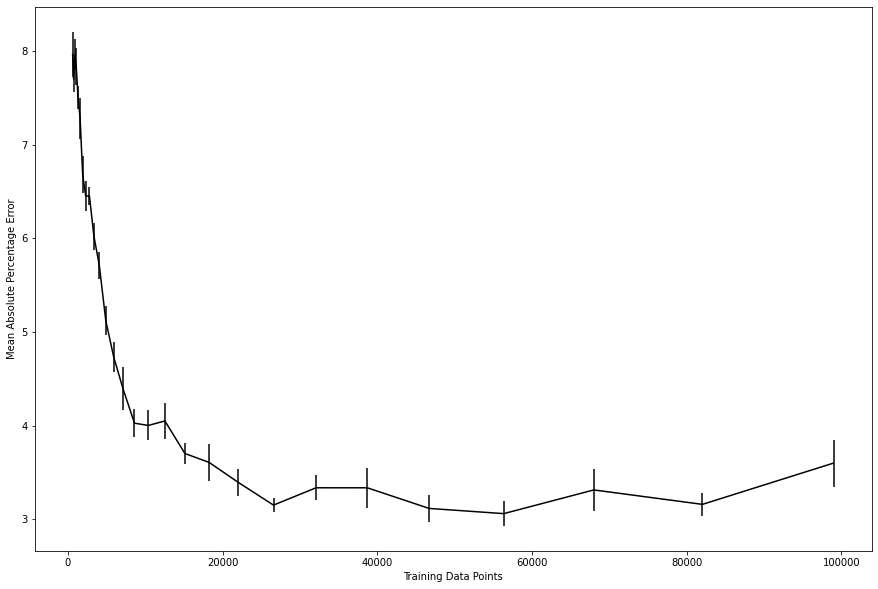

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
wierd_shit = 22
mean_mape = np.mean(min_mae,axis=1)
std_mape = np.std(min_mae, axis = 1)
ax.errorbar(training_points[wierd_shit:],mean_mape[wierd_shit:],yerr = std_mape[wierd_shit:]/(10)**0.5 ,
c = 'black')
ax.set_xlabel('Training Data Points')
ax.set_ylabel('Mean Absolute Percentage Error')

In [50]:
fig.savefig('../Figures/Mape_training_data_points.png',dpi = 300)

In [65]:
training_points_slice = training_points[wierd_shit:]
mean_mape_slice = mean_mape[wierd_shit:]
print(min_val_bool)

[[1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1. 1. 1. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0.

In [63]:
training_points_slice[np.argmin(mean_mape_slice)-1]

46715

For Future tests aproc 50,000 seems to be a good point for training data length
